In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt
from math import ceil
import os

In [2]:
np.set_printoptions(formatter={'float': lambda x: format(x, '1.2E')})
nTurn = 128
nTurnSplit = int(nTurn/64)
betx = 1.9065054393933862
alfx = 1.408226172730429
emitx = 6.066503e-6
nCore_y = 8
nCore_z = 4
n_particles = 40000
nx = 100
NL_t = 0.4
NL_c = 0.01
print('singular point = ', NL_c*np.sqrt(betx))

singular point =  0.013807626296338507


# 1. Preparation

In [3]:
beam, lattice = impact.readInputFile('test.in')
ke   = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

reading ImpactZ input file (test.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
indexTBT,TBTdataTmp = impact.readTBT(0,ke,mass,freq)
pDataIn = impact.readParticleData(-111110,ke,mass,freq)
pDataOut= impact.readParticleData(-111111,ke,mass,freq)

# 2. plot

(7668, 9)
(3128, 9)


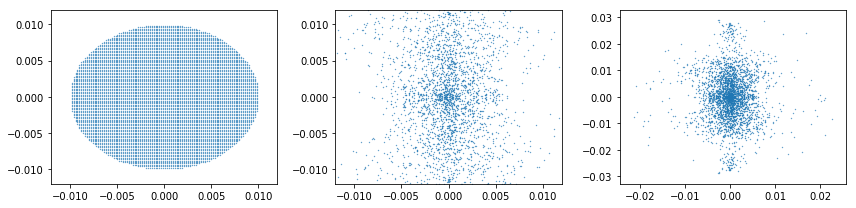

In [5]:
print(pDataIn.shape)
print(pDataOut.shape)
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(pDataIn[:,0],pDataIn[:,2],s=0.1)
plt.xlim(-0.012,0.012)
plt.ylim(-0.012,0.012)
plt.subplot(1,3,2)
plt.scatter(pDataOut[:,0],pDataOut[:,2],s=0.1)
plt.xlim(-0.012,0.012)
plt.ylim(-0.012,0.012)
plt.subplot(1,3,3)
plt.scatter(pDataOut[:,0],pDataOut[:,2],s=0.1)
# plt.xlim(-0.04,0.04)
# plt.ylim(-0.06,0.06)
plt.tight_layout()

(256, 6, 3130)


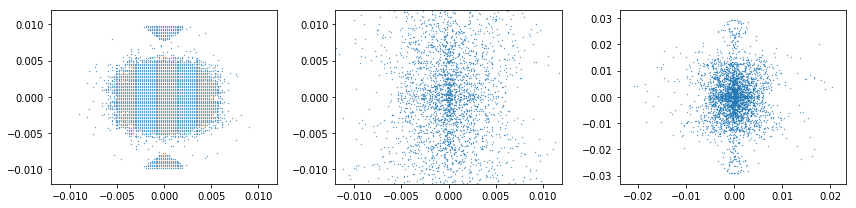

In [6]:
print(TBTdataTmp.shape)
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.scatter(TBTdataTmp[0,0,:],TBTdataTmp[0,2,:],s=0.1)
plt.xlim(-0.012,0.012)
plt.ylim(-0.012,0.012)
plt.subplot(1,3,2)
plt.scatter(TBTdataTmp[-1,0,:],TBTdataTmp[-1,2,:],s=0.1)
plt.xlim(-0.012,0.012)
plt.ylim(-0.012,0.012)
plt.subplot(1,3,3)
plt.scatter(TBTdataTmp[-1,0,:],TBTdataTmp[-1,2,:],s=0.1)
# plt.xlim(-0.04,0.04)
# plt.ylim(-0.06,0.06)
plt.tight_layout()

[3.33E-03 0.00E+00 6.16E-03 0.00E+00 0.00E+00 0.00E+00]


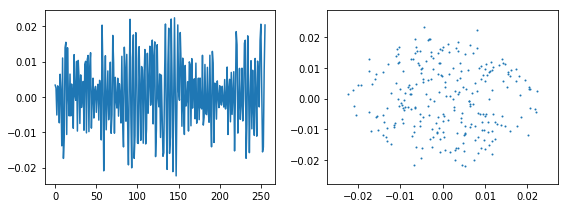

In [7]:
nMax=np.argmax(TBTdataTmp[-1,0,:])
print(TBTdataTmp[0,:,nMax])
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(TBTdataTmp[:,0,nMax])
plt.subplot(1,2,2)
plt.scatter(TBTdataTmp[:,0,nMax],TBTdataTmp[:,2,nMax],s=1)
plt.tight_layout()